# MODULOS

In [2]:
!pip install cartopy #instalacion de paquetes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 64.3 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import gridspec
from cartopy import crs,feature
from scipy import stats
from sklearn.decomposition import PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EJEMPLO NUMERICO

## FUNCIONES

In [4]:
def apply_fft(y):
    fourier = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y))
    periodo = 1/freq
    potencia = np.abs(fourier)**2
    return (fourier, freq, periodo, potencia)
def apply_ifft(fourier):
    inversa = np.fft.ifft(fourier)
    return inversa

## Transformada de Fourier

\begin{equation}
\hat{T}(s)=\int_{-\infty}^{\infty} f(t) K(s,t) d t.
\end{equation}

\begin{equation}
\hat{f}(\omega)=\int_{-\infty}^{\infty} f(t) e^{-2 \pi i \omega t} d t.
\end{equation}

Donde:

Kernel = $e^{-2 \pi i \omega t} $

Fecuencia = $\omega$ -> obtenemos números complejos para cada frecuencia

Vale recordar la identidad

$ e^{i \theta} = \cos \theta + i \sin \theta$

Para devolverse al dominio del tiempo.

\begin{equation}
f(t) =\int_{-\infty}^{\infty} \hat{f}(\omega) e^{2 \pi i \omega t} d \omega.
\end{equation}

--------------------------------------------------------------------------------
Ahora la transformada discreta de fourier se ve así:
\begin{equation}
X_k = \sum_{n=0}^{N-1} x_n e^{-i 2 \pi \frac{k}{N} n }, \quad k = 0, 1, 2, \dots, N-1
\end{equation}

Donde

$N$ : Número de datos

$\frac{k}{N}$: Equivalente  a $\omega$

$n$: Equivalente a $t$

## GENERACION DE DATOS

In [5]:
t = (2*np.pi/1000)*np.arange(1,3000) # Vector Temporal
omega_1 = 10
omega_2 = 1
omega_3 = 5
y1 = 1* np.sin(omega_1*t)
y2 = 2* np.sin(omega_1*t) + np.sin(omega_2*t)
y3 = 1* np.sin(omega_1*t) + np.sin(omega_2*t) + np.sin(omega_3*t)

In [6]:
# Periodos
T1 = 2 * np.pi / omega_1
T2 = 2 * np.pi / omega_2
T3 = 2 * np.pi / omega_3

In [ ]:
T1#/(2*np.pi)

0.6283185307179586

Text(0, 0.5, 'Y3')

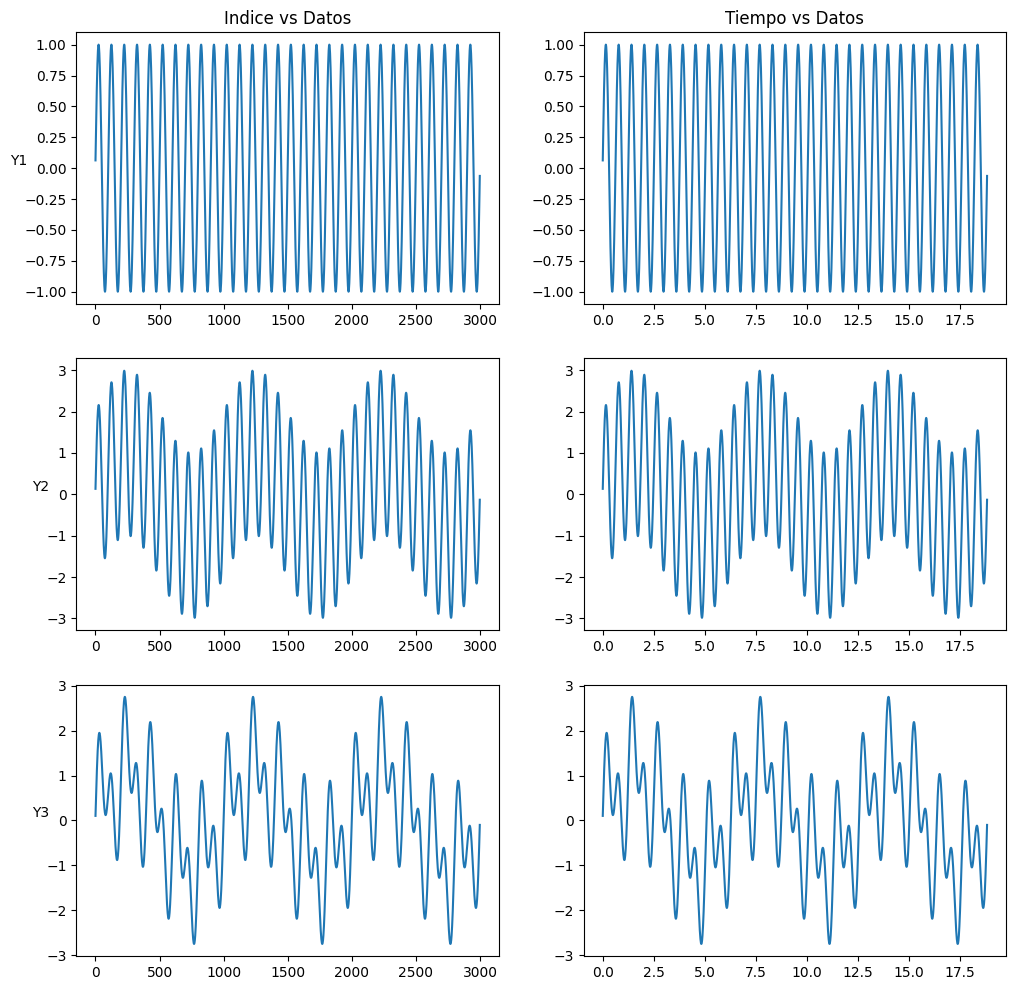

In [7]:
fig=plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3, 2)
ax1,ax2=fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1])
ax3,ax4=fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1])
ax5,ax6=fig.add_subplot(gs[2,0]),fig.add_subplot(gs[2,1])
ax1.plot(y1);ax2.plot(t,y1)
ax3.plot(y2);ax4.plot(t,y2)
ax5.plot(y3);ax6.plot(t,y3)
ax1.set_title('Indice vs Datos')
ax2.set_title('Tiempo vs Datos')
ax1.set_ylabel('Y1',rotation=0)
ax3.set_ylabel('Y2',rotation=0)
ax5.set_ylabel('Y3',rotation=0)
#for t1 in np.arange(0, 3000, T1/(2*np.pi/1000)):
#    ax1.axvline(t1, color='blue', alpha=0.5)
#    ax3.axvline(t1, color='blue', alpha=0.2)
#    ax5.axvline(t1, color='blue', alpha=0.2)
#for t2 in np.arange(0, 3000, T2/(2*np.pi/1000)):
#    ax3.axvline(t2, color='red', alpha=0.5)
#    ax5.axvline(t2, color='red', alpha=0.3)
#for t3 in np.arange(0, 3000, T3/(2*np.pi/1000)):
#    ax5.axvline(t3, color='gray', alpha=0.5)

## AJUSTES

In [8]:
fouriery1 = np.fft.fft(y1) #Coeficientes y1
fouriery2 = np.fft.fft(y2) #Coeficientes y2
fouriery3 = np.fft.fft(y3) #Coeficientes y3

In [9]:
fouriery1.shape

(2999,)

In [10]:
y1.shape

(2999,)

In [11]:
freq = np.fft.fftfreq(len(y1)) #Frecuencias para y1,y2,y3
periodo = 1/freq # Periodo y1,y2,y3
freq_pos = freq[freq>=0] # Frecuencias positivas (Por simetria)
periodo_pos = periodo[freq>=0] # Periodos positivos (Por simetria)

/tmp/ipython-input-11-3142181467.py:2: RuntimeWarning: divide by zero encountered in divide
  periodo = 1/freq # Periodo y1,y2,y3


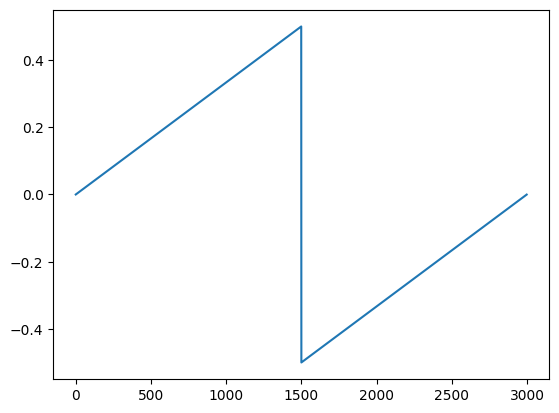

In [12]:
plt.plot(freq)

In [13]:
print("Frecuencia minima 1/n: ",1/2999) #Paso de frecuencia
print("Frecuencia minima: ",freq[0:2])
print("Frecuencia maxma: ", 1/2) #(Nyquist) delta de tiempo/2

Frecuencia minima 1/n:  0.00033344448149383126
Frecuencia minima:  [0.         0.00033344]
Frecuencia maxma:  0.5


In [14]:
freq[0:5]

array([0.        , 0.00033344, 0.00066689, 0.00100033, 0.00133378])

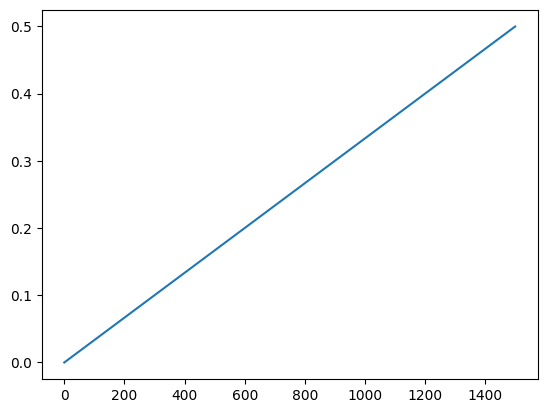

In [15]:
plt.plot(freq_pos)

In [16]:
potenciay1 = np.abs(fouriery1)**2
potenciay2 = np.abs(fouriery2)**2
potenciay3 = np.abs(fouriery3)**2

In [17]:
potenciay1_pos = potenciay1[freq>=0]
potenciay2_pos = potenciay2[freq>=0]
potenciay3_pos = potenciay3[freq>=0]

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Y3')

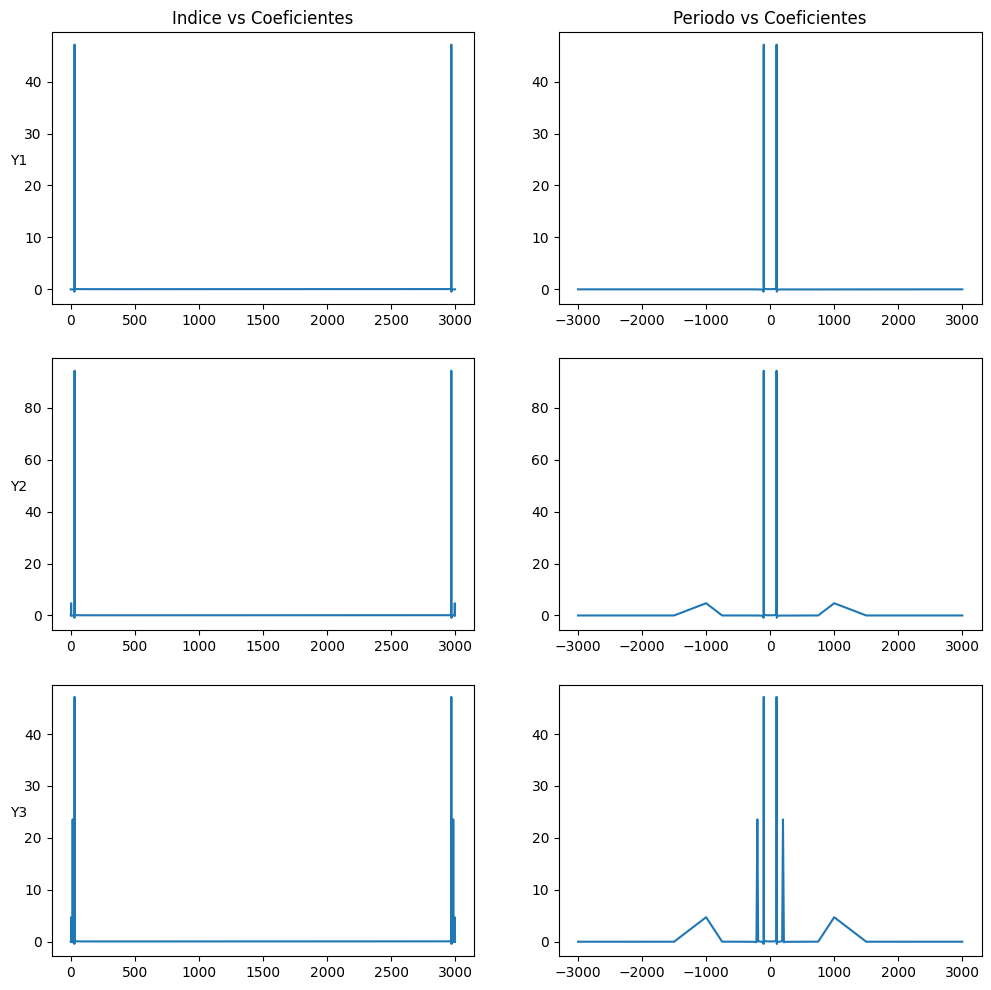

In [18]:
fig=plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3, 2)
ax1,ax2=fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1])
ax3,ax4=fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1])
ax5,ax6=fig.add_subplot(gs[2,0]),fig.add_subplot(gs[2,1])
ax1.plot(fouriery1);ax2.plot(periodo,fouriery1)
ax3.plot(fouriery2);ax4.plot(periodo,fouriery2)
ax5.plot(fouriery3);ax6.plot(periodo,fouriery3)
ax1.set_title('Indice vs Coeficientes')
ax2.set_title('Periodo vs Coeficientes')
ax1.set_ylabel('Y1',rotation=0)
ax3.set_ylabel('Y2',rotation=0)
ax5.set_ylabel('Y3',rotation=0)

## ESPECTROS DE POTENCIA

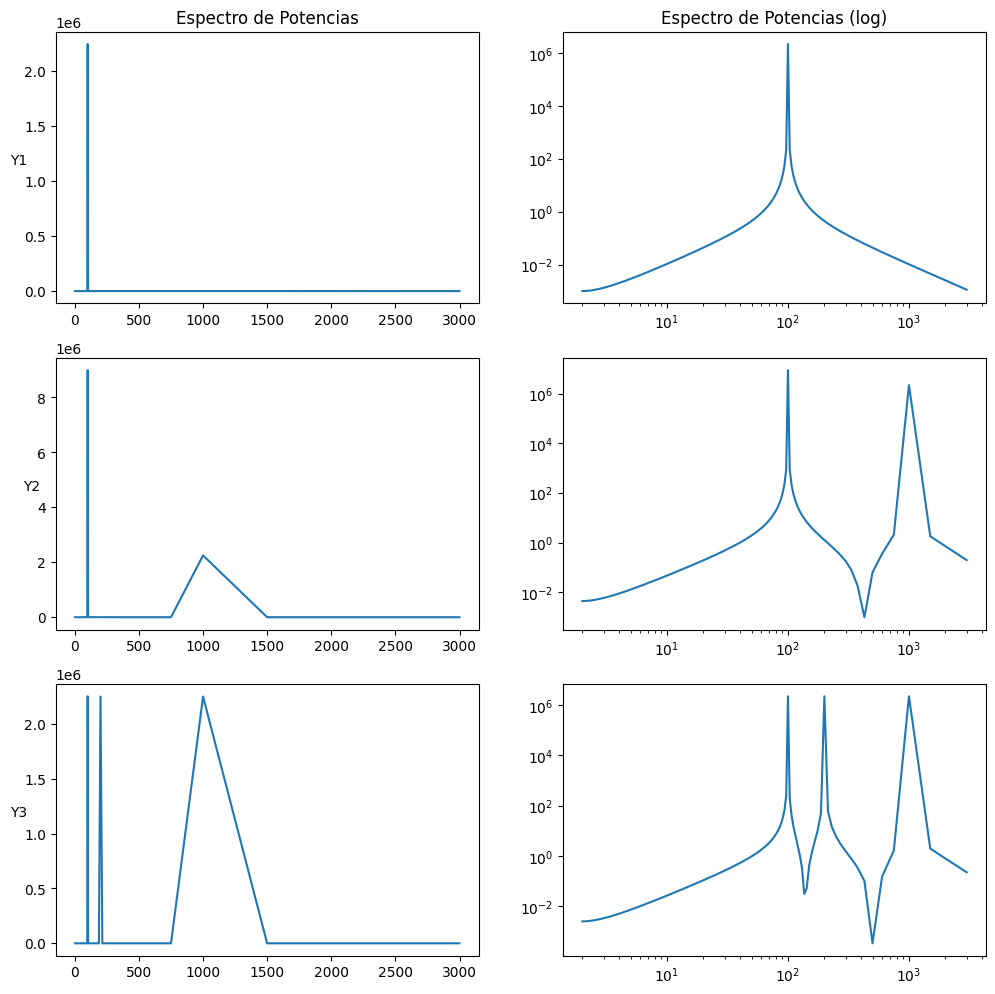

In [21]:
fig=plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3, 2)
ax1,ax2=fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1])
ax3,ax4=fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1])
ax5,ax6=fig.add_subplot(gs[2,0]),fig.add_subplot(gs[2,1])
ax1.plot(periodo_pos,potenciay1_pos);ax2.plot(periodo_pos,potenciay1_pos)
ax3.plot(periodo_pos,potenciay2_pos);ax4.plot(periodo_pos,potenciay2_pos)
ax5.plot(periodo_pos,potenciay3_pos);ax6.plot(periodo_pos,potenciay3_pos)
ax1.set_title('Espectro de Potencias')
ax2.set_title('Espectro de Potencias (log)')
ax1.set_ylabel('Y1',rotation=0);ax2.set_xscale('log');ax2.set_yscale('log')
ax3.set_ylabel('Y2',rotation=0);ax4.set_xscale('log');ax4.set_yscale('log')
ax5.set_ylabel('Y3',rotation=0);ax6.set_xscale('log');ax6.set_yscale('log')

## PROBLEMAS DE LA TRANSFORMADA DE FOURIER

In [ ]:
y1_cut = y1[:-50]
y1_plusline = y1 + np.arange(0,1,1/len(y1))
y1_line =  np.arange(0,1,1/len(y1))

Text(0.5, 1.0, 'Linea Tendencia')

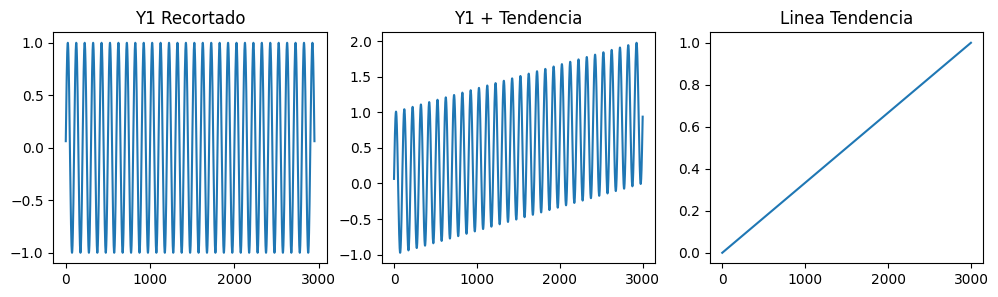

In [ ]:
fig=plt.figure(figsize=(12,3))
gs = gridspec.GridSpec(1, 3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])
ax1.plot(y1_cut)
ax2.plot(y1_plusline)
ax3.plot(y1_line)
ax1.set_title('Y1 Recortado')
ax2.set_title('Y1 + Tendencia')
ax3.set_title('Linea Tendencia')

In [ ]:
fouriery1_cut = np.fft.fft(y1_cut) #Coeficientes y1
fouriery1_plusline = np.fft.fft(y1_plusline) #Coeficientes y2
fouriery1_line= np.fft.fft(y1_line) #Coeficientes y3

In [ ]:
freq_cut = np.fft.fftfreq(len(y1_cut)) #Frecuencias para y1,y2,y3
periodo_cut = 1/freq_cut # Periodo y1,y2,y3
freq_pos_cut = freq_cut[freq_cut>=0] # Frecuencias positivas (Por simetria)
periodo_pos_cut = periodo_cut[freq_cut>=0] # Periodos positivos (Por simetria)

/tmp/ipython-input-23-808424390.py:2: RuntimeWarning: divide by zero encountered in divide
  periodo_cut = 1/freq_cut # Periodo y1,y2,y3


In [ ]:
potenciay1_cut = np.abs(fouriery1_cut)**2
potenciay1_plusline = np.abs(fouriery1_plusline)**2
potenciay1_line = np.abs(fouriery1_line)**2

In [ ]:
potenciay1_cut_pos = potenciay1_cut[freq_cut>=0]
potenciay1_plusline_pos = potenciay1_plusline[freq>=0]
potenciay1_line_pos = potenciay1_line[freq>=0]

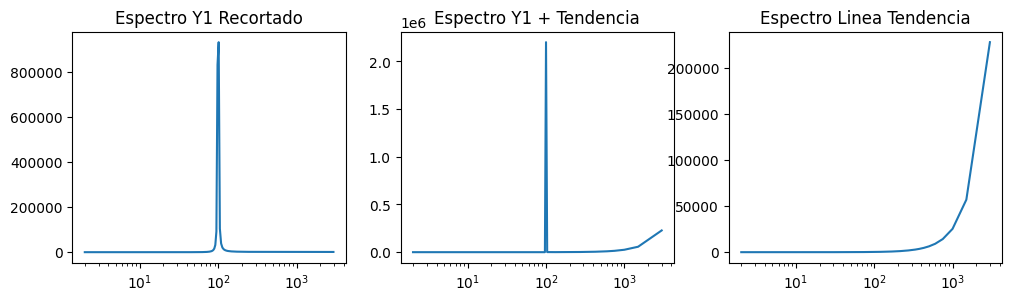

In [ ]:
fig=plt.figure(figsize=(12,3))
gs = gridspec.GridSpec(1, 3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])
ax1.plot(periodo_pos_cut,potenciay1_cut_pos)
ax2.plot(periodo_pos,potenciay1_plusline_pos)
ax3.plot(periodo_pos, potenciay1_line_pos)
ax1.set_title('Espectro Y1 Recortado')
ax2.set_title('Espectro Y1 + Tendencia')
ax3.set_title('Espectro Linea Tendencia')
for ax in [ax1,ax2,ax3]:
  ax.set_xscale('log')

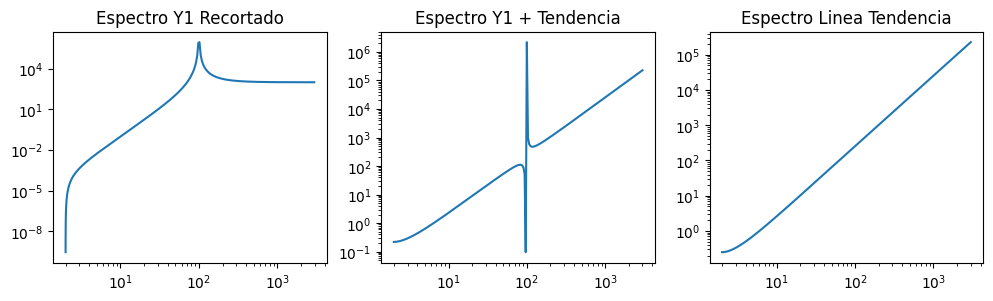

In [ ]:
fig=plt.figure(figsize=(12,3))
gs = gridspec.GridSpec(1, 3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])
ax1.plot(periodo_pos_cut,potenciay1_cut_pos)
ax2.plot(periodo_pos,potenciay1_plusline_pos)
ax3.plot(periodo_pos, potenciay1_line_pos)
ax1.set_title('Espectro Y1 Recortado')
ax2.set_title('Espectro Y1 + Tendencia')
ax3.set_title('Espectro Linea Tendencia')
for ax in [ax1,ax2,ax3]:
  ax.set_xscale('log')
  ax.set_yscale('log')

## TEOREMA DE PARSIVAL

In [ ]:
#Teorema de Parsival
print('Teorema de Parsival')
print(25*'-')
for i,(data,potencia) in enumerate(zip([y1,y2,y3,y1_cut,y1_plusline,y1_line],
                                       [potenciay1,potenciay2,potenciay3,
                                        potenciay1_cut,potenciay1_plusline,potenciay1_line])):
  print(f"Datos: Y{i+1}")
  print(f"Varianza directa: {round(np.var(data),4)}",end='; ')
  print(f"Varianza suma de potencias: {round(np.sum(potencia)/len(data)**2,4)}")
  print(25*'-')

Teorema de Parsival
-------------------------
Datos: Y1
Varianza directa: 0.5002; Varianza suma de potencias: 0.5002
-------------------------
Datos: Y2
Varianza directa: 2.5008; Varianza suma de potencias: 2.5008
-------------------------
Datos: Y3
Varianza directa: 1.5005; Varianza suma de potencias: 1.5005
-------------------------
Datos: Y4
Varianza directa: 0.5001; Varianza suma de potencias: 0.5002
-------------------------
Datos: Y5
Varianza directa: 0.5729; Varianza suma de potencias: 0.8227
-------------------------
Datos: Y6
Varianza directa: 0.0833; Varianza suma de potencias: 0.3332
-------------------------


# Fourier SST

## PATHS

In [ ]:
path_datos = '/content/drive/MyDrive/2025-S1/Monitoria_ada/datos/'

## DATOS

In [ ]:
sst_data = xr.open_dataset(path_datos + 'sst.mnmean.nc')#https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2/
sst_mask = xr.open_dataset(path_datos + 'lsmask.nc')
ppt_data = xr.open_dataset(path_datos + 'precip.mon.mean.nc')#!wget -c https://downloads.psl.noaa.gov/Datasets/gpcp/precip.mon.mean.nc

In [ ]:
sst_data_clean = sst_data['sst'].where(sst_mask.isel(time=0).squeeze() == 1)
sst_data_clean = sst_data_clean.rename_vars({'mask': 'sst'})

In [ ]:
pacific_clean = sst_data_clean.sel(lon=slice(100,360-70),lat=slice(40,-40))
pacific_clean_sin_cd = pacific_clean.groupby('time.month') - pacific_clean.groupby('time.month').mean('time')

In [ ]:
serie1 = pacific_clean.sel(lat=0,lon=250,method='nearest').sst - pacific_clean.sel(lat=0,lon=250,method='nearest').sst.mean()
serie2 = pacific_clean.sel(lat=0,lon=50,method='nearest').sst - pacific_clean.sel(lat=0,lon=250,method='nearest').sst.mean()

## FFT

In [ ]:
fourier_serie1_sst = np.fft.fft(serie1.values)

In [ ]:
freq_sst = np.fft.fftfreq(len(fourier_serie1_sst)) #Frecuencias para y1,y2,y3
periodo_sst = 1/freq_sst # Periodo y1,y2,y3
freq_pos_sst = freq_sst[freq_sst>=0] # Frecuencias positivas (Por simetria)
periodo_pos_sst = periodo_sst[freq_sst>=0] # Periodos positivos (Por simetria)

/tmp/ipython-input-35-541095080.py:2: RuntimeWarning: divide by zero encountered in divide
  periodo_sst = 1/freq_sst # Periodo y1,y2,y3


In [ ]:
potencia_sst = np.abs(fourier_serie1_sst)**2
potencia_sst_pos = potencia_sst[freq_sst>=0]

## ESPECTRO DE POTENCIAS

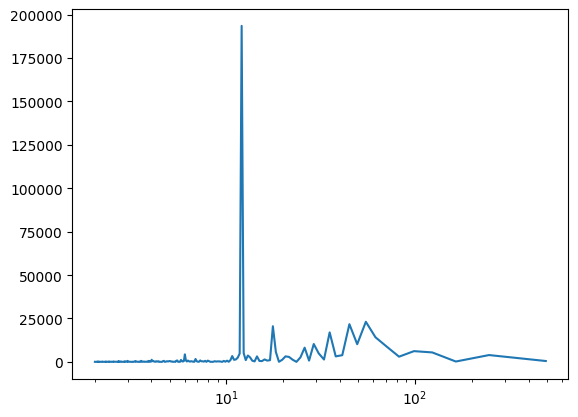

In [ ]:
plt.plot(periodo_pos_sst,potencia_sst_pos)
plt.xscale('log')

## FILTROS DE FOURIER

In [ ]:
filtro_fourier_sst1 = fourier_serie1_sst  .copy()
filtro_fourier_sst1[np.where((np.abs(freq_sst) < 0.088) | (np.abs(freq_sst) > 0.15))] = 0

## SERIE RECONTRUIDA

In [ ]:
serie_reconstruida_sst1 = np.fft.ifft(filtro_fourier_sst1)

## GRAFICO SERIE + SERIE RECONTRUIDA

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


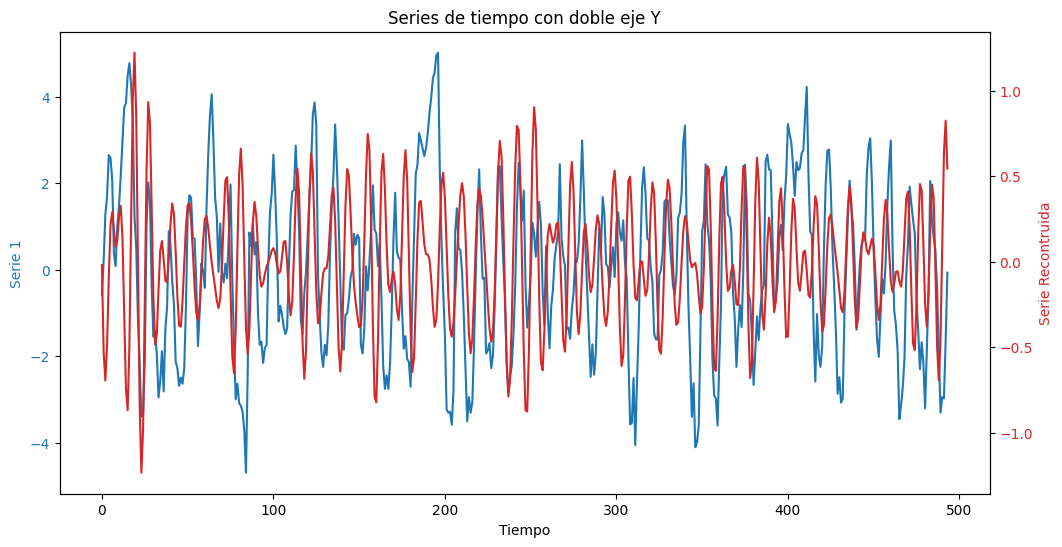

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(serie1, color='tab:blue', label='Serie 1')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Serie 1', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(serie_reconstruida_sst1, color='tab:red', label='Serie 2')
ax2.set_ylabel('Serie Recontruida', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Series de tiempo con doble eje Y')
plt.show()

# PCA SST

## AJUSTES

In [ ]:
pacific_clean_sin_cd_stack = pacific_clean_sin_cd.stack(z=('lat','lon')).fillna(0)

In [ ]:
pca = PCA(n_components=10)
pca.fit(pacific_clean_sin_cd_stack.sst)

PCA(n_components=10)

In [ ]:
transformed_data_clean_sin_cd = pca.transform(pacific_clean_sin_cd_stack.sst)
transformed_data_clean_sin_cd.shape

(494, 10)

In [ ]:
varianza_clean_sin_cd = pca.explained_variance_ratio_*100

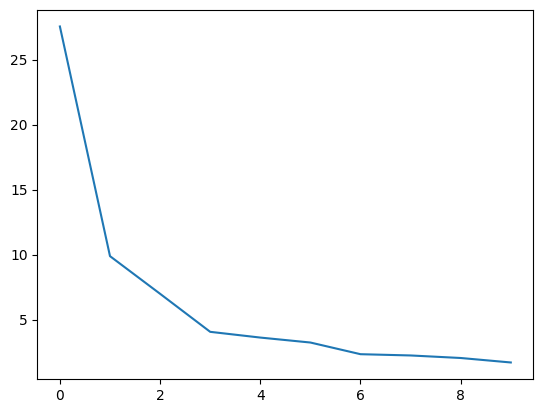

In [ ]:
plt.plot(varianza_clean_sin_cd)

In [ ]:
first_spatial_mode = pca.components_[0,:].reshape(len(pacific_clean_sin_cd.lat), len(pacific_clean_sin_cd.lon))
first_spatial_mode = np.where(~pacific_clean_sin_cd.isel(time=0).sst.isnull(), first_spatial_mode, np.nan)

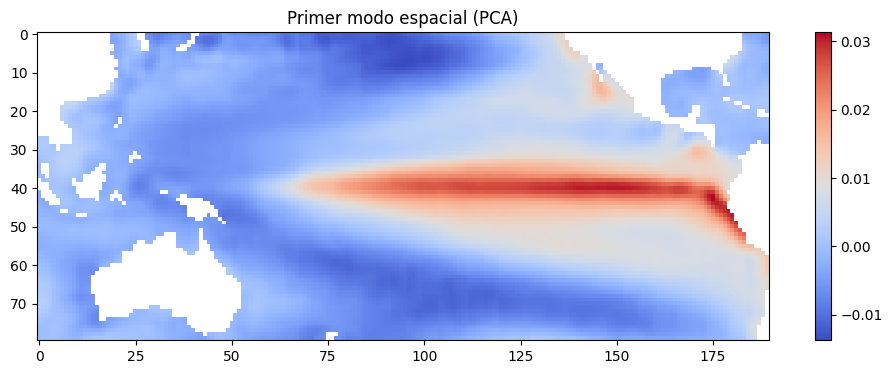

In [ ]:
plt.figure(figsize=(12, 4))
plt.imshow(first_spatial_mode,cmap='coolwarm')
plt.colorbar()
plt.title('Primer modo espacial (PCA)')
plt.show()

# PCA - STT PPT

In [ ]:
pca_2 = PCA(n_components=10)
pca_2.fit(pacific_clean_sin_cd_stack.sst.T)

PCA(n_components=10)

In [ ]:
ppt_data_al = ppt_data.sel(time=slice('1981-12-01','2023-01-01'))

In [ ]:
ppt_data_al_sin_cd = ppt_data_al.groupby('time.month') - ppt_data_al.groupby('time.month').mean('time')

In [ ]:
ppt_data_al_sin_cd_stack = ppt_data_al_sin_cd.stack(z=('lat','lon')).fillna(0)

In [ ]:
transformed_data_clean_sin_cd = pca_2.transform(pacific_clean_sin_cd_stack.sst.T)
transformed_data_clean_sin_cd.shape

(15200, 10)

In [ ]:
ppt_repro = pca_2.transform(ppt_data_al_sin_cd_stack.precip.T)
ppt_repro.shape

(10368, 10)

In [ ]:
first_spatial_mode_ppt = ppt_repro[:,0].reshape(len(ppt_data_al.lat), len(ppt_data_al.lon))
first_spatial_mode_ppt.shape

(72, 144)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


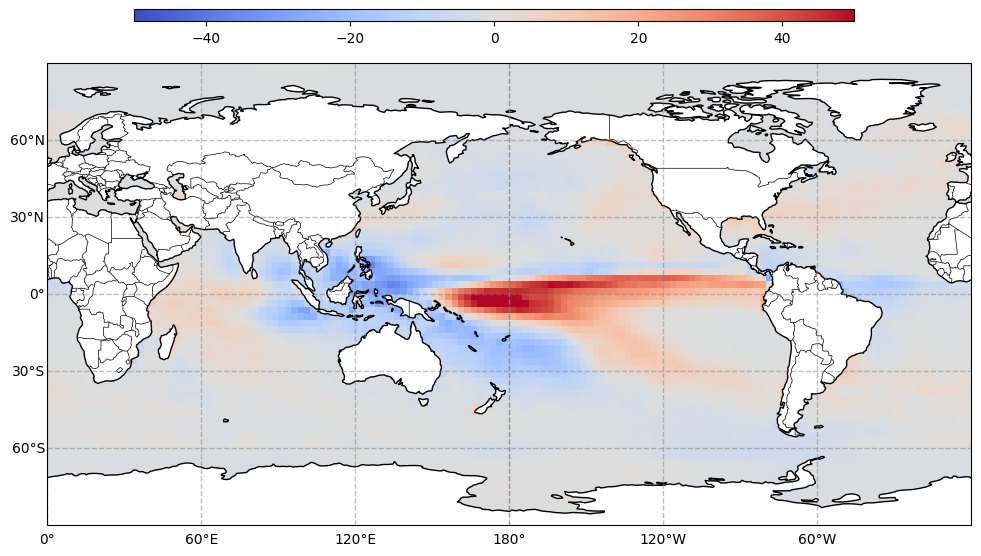

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111,projection=crs.PlateCarree(central_longitude=180))
cax = fig.add_axes([0.2, 0.95, 0.6, 0.02]) #axis barra de color

gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Agregar los datos
mesh = ax.pcolormesh(
    ppt_data_al.lon, ppt_data_al.lat,
    first_spatial_mode_ppt,
    cmap='coolwarm',
    vmin=-50, vmax=50,
    transform=crs.PlateCarree())

ax.coastlines()
ax.add_feature(feature.BORDERS, linewidth=0.5)
ax.add_feature(feature.LAND, facecolor='white',zorder=1)
cbar = plt.colorbar(mesh, cax=cax, orientation='horizontal')

In [ ]:
second_spatial_mode_ppt = ppt_repro[:,1].reshape(len(ppt_data_al.lat), len(ppt_data_al.lon))
second_spatial_mode_ppt.shape

(72, 144)

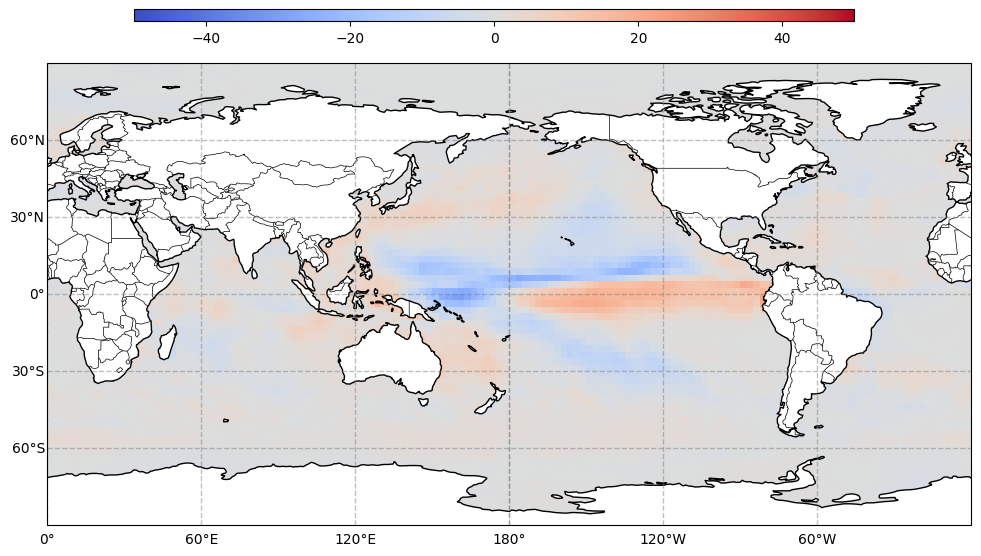

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111,projection=crs.PlateCarree(central_longitude=180))
cax = fig.add_axes([0.2, 0.95, 0.6, 0.02]) #axis barra de color

gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Agregar los datos
mesh = ax.pcolormesh(
    ppt_data_al.lon, ppt_data_al.lat,
    second_spatial_mode_ppt,
    cmap='coolwarm',
    vmin=-50, vmax=50,
    transform=crs.PlateCarree())

ax.coastlines()
ax.add_feature(feature.BORDERS, linewidth=0.5)
ax.add_feature(feature.LAND, facecolor='white',zorder=1)
cbar = plt.colorbar(mesh, cax=cax, orientation='horizontal')

In [ ]:
first_spatial_mode = pca.components_[0,:].reshape(len(pacific_clean.lat), len(pacific_clean.lon))
first_spatial_mode = np.where(~pacific_clean_sin_cd.isel(time=0).sst.isnull(), first_spatial_mode, np.nan)

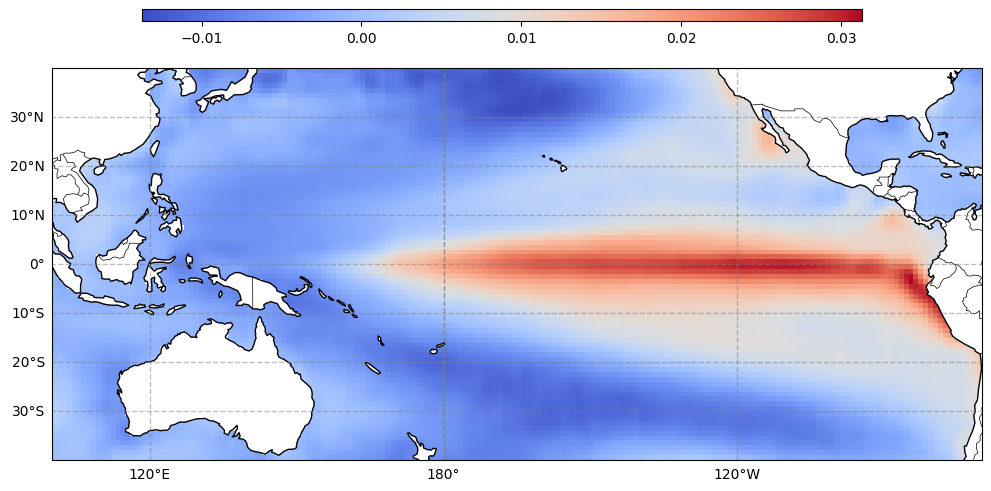

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111,projection=crs.PlateCarree(central_longitude=180))
cax = fig.add_axes([0.2, 0.9, 0.6, 0.02]) #axis barra de color

gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Agregar los datos
mesh = ax.pcolormesh(
    pacific_clean.lon, pacific_clean.lat,
    first_spatial_mode,
    cmap='coolwarm',
    #vmin=-50, vmax=50,
    transform=crs.PlateCarree())

ax.coastlines()
ax.add_feature(feature.BORDERS, linewidth=0.5)
ax.add_feature(feature.LAND, facecolor='white',zorder=1)
cbar = plt.colorbar(mesh, cax=cax, orientation='horizontal')